In [119]:
from astropy.time import Time, TimeDelta
import numpy as np

from poliastro.bodies import Venus, Earth, Mars, Jupiter, Saturn, Sun
from poliastro.frames import Planes
from poliastro.ephem import Ephem

#from poliastro.plotting import StaticOrbitPlotter, OrbitPlotter2D
from poliastro.maneuver import Maneuver
from poliastro.twobody import Orbit
from poliastro.util import norm
from astropy import units as u
from poliastro.examples import molniya
from poliastro.util import time_range

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as mdates

arrivalBody = Jupiter#choose


# epoch1 = Time("2030-08-17 12:05:50", scale="tdb")#Start date of plot
# epoch2 = Time("2040-10-17 12:05:50", scale="tdb")#end date of plot

#epoch3 = Time("2038-11-17 12:05:50", scale="tdb")#
MinTof = 0 << u.year
MaxTof = 2 << u.year#maximum allowed time of flight
tejRes = 5 << u.day
tofRes = 5 << u.day




# ##find the ephemeris of earth, mars at date of launch & at date of arrival
# earth = Ephem.from_body(Earth, time_range(epoch1, end=epoch3))
# arrivalbody = Ephem.from_body(arrivalBody, time_range(epoch1, end=epoch3))
lowest_dv = 3000

    ###Solve lambert for iterated TEJ, TOF
# current_epoch = epoch1
# for i in range(rows):
#     current_epoch += tejRes
#     #find the orbit of earth & mars at launch & landing
#     # Solve for departure and target orbits
#     ss_earth = Orbit.from_ephem(Sun, earth, current_epoch)
#     currentTof = 0
#     for j in range(cols):
#         currentTof += tofRes 
#         arrivalTime = current_epoch + currentTof
#         ss_arrival = Orbit.from_ephem(Sun, arrivalbody, arrivalTime)
#         # Solve for the transfer maneuver 
#         man_lambert = Maneuver.lambert(ss_earth, ss_arrival)

        
#         maneuver_array[i][j] = man_lambert[0]
        
#         dv = np.linalg.norm(maneuver_array[i][j][1].value)
#         if(dv<lowest_dv):
#                     lowest_dv = dv
#         dv_array[i][j] = int(dv)
#         date_array[i][j] = current_epoch,arrivalTime
#print(date_array[20][58])

def calculatePork(start_body,end_body,start_date,end_date):
    epoch_1 = start_date
    epoch_2 = end_date
    epoch_3 = epoch_2+ 1.2*MaxTof
    current_epoch = epoch_1
    print(f"Checking over {epoch_1} to {epoch_2}")
    print(f"Looking for trajectories from {start_body} to {end_body}")
    
    rows = int((epoch_2-epoch_1)/tejRes)
    cols = int(MaxTof.to(u.day)/tejRes)

    maneuver_array = np.empty((rows, cols), dtype=object)
    dv_array = np.empty((rows, cols), dtype=object)
    date_array = np.empty((rows, cols), dtype=object)

    ##find the ephemeris of earth, mars at date of launch & at date of arrival
    start_body_ephem = Ephem.from_body(start_body, time_range(epoch_1, end=epoch_3))
    arrival_body_ephem = Ephem.from_body(end_body, time_range(epoch_1, end=epoch_3))
    lowest_dv = 4000
    for i in range(rows):
        current_epoch += tejRes
        #find the orbit of earth & mars at launch & landing
        # Solve for departure and target orbits
        ss_earth = Orbit.from_ephem(Sun, start_body_ephem, current_epoch)
        currentTof = 0
        for j in range(cols):
            currentTof += tofRes 
            arrivalTime = current_epoch + currentTof
            ss_arrival = Orbit.from_ephem(Sun, arrival_body_ephem, arrivalTime)
            # Solve for the transfer maneuver 
            man_lambert = Maneuver.lambert(ss_earth, ss_arrival)

            
            maneuver_array[i][j] = man_lambert[0]
            
            dv = np.linalg.norm(maneuver_array[i][j][1].value)
            if(dv<lowest_dv):
                        lowest_dv = dv
            dv_array[i][j] = int(dv)
            date_array[i][j] = current_epoch,arrivalTime
    print(lowest_dv)      
    return date_array,dv_array

date1 = Time("2026-01-01 12:05:50", scale="tdb")
date2 = Time("2030-01-01 12:05:50", scale="tdb")
dates,dvs = calculatePork(Earth,Mars,date1,date2)
#print(dvs[0])


Checking over 2026-01-01 12:05:50.000 to 2030-01-01 12:05:50.000
Looking for trajectories from Earth (♁) to Mars (♂)


KeyboardInterrupt: 

In [120]:
mars_dvs = np.loadtxt('mars_dvs.csv', delimiter=',')
jupiter_dvs = np.loadtxt('jupiter_dvs.csv', delimiter=',')
saturn_dvs = np.loadtxt('saturn_dvs.csv', delimiter=',')


In [ ]:
date1 = Time("2026-01-01 12:05:50", scale="tdb")
date2 = Time("2050-01-01 12:05:50", scale="tdb")
searchTime = (date2-date1).value #days
MaxTof = 4*365 << u.day 
tejRes = 5 << u.day
tofRes = 5 << u.day
mars_block_sizes_1 = (int(MaxTof.value/(8*tofRes.value)),int(searchTime/tejRes.value))
mars_block_sizes_2 = (int(MaxTof.value/((4/2.3)*tofRes.value)),int(searchTime/tejRes.value))

mars_block_1 = np.full(mars_block_sizes_1,fill_value=100000)
mars_block_2 = np.full(mars_block_sizes_2,fill_value=100000)

mars_dvs_full=np.vstack([mars_dvs.T,mars_block_1])
outer_block_sizes = (int(MaxTof.value/(4*tofRes.value)),int(searchTime/tejRes.value))
outer_block = np.full(outer_block_sizes,fill_value=100000)
jupiter_dvs_full=np.vstack([outer_block,jupiter_dvs.T])
saturn_dvs_full=np.vstack([outer_block,saturn_dvs.T])




No handles with labels found to put in legend.


<class 'astropy.time.core.TimeDelta'>
292
1460.0


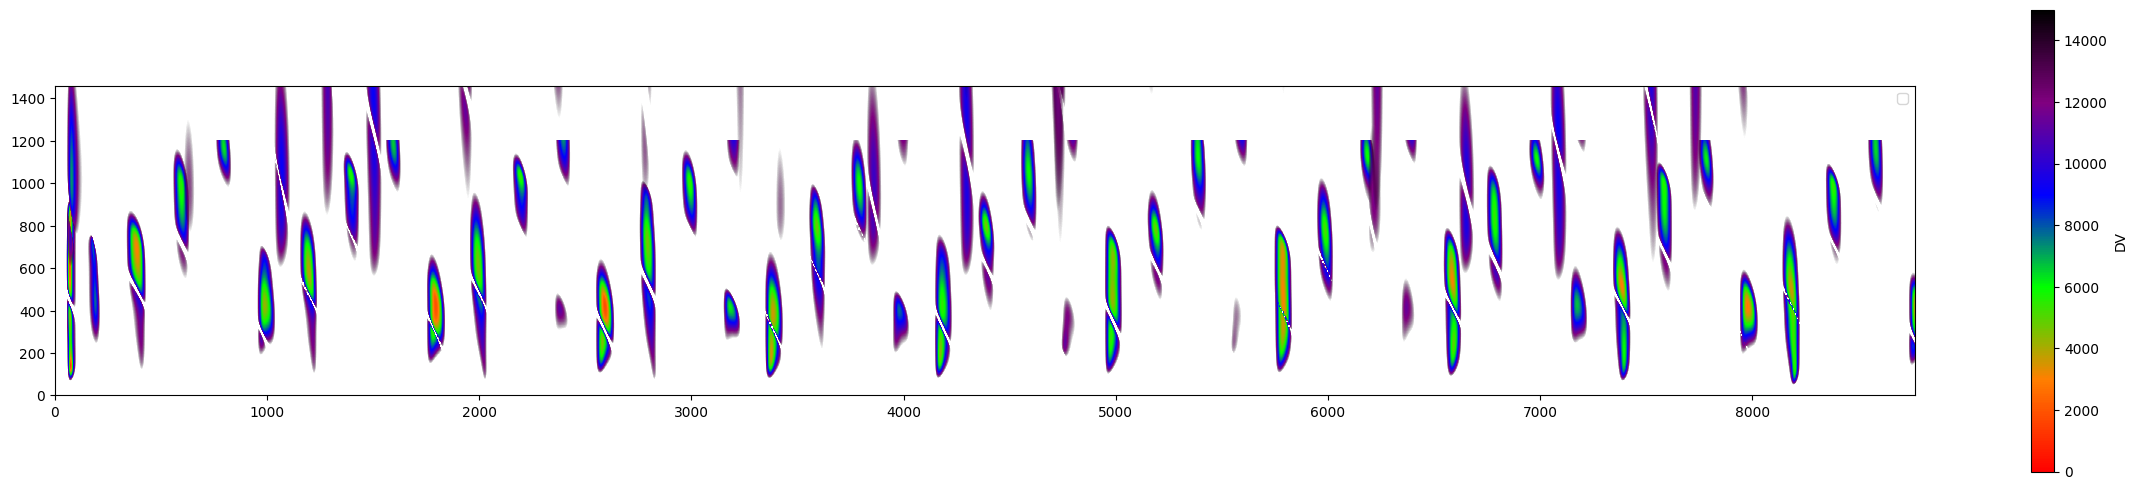

In [122]:
# grid_x,grid_y=np.meshgrid(np.linspace(0,1,int(dvs.size)),np.linspace(0,1,int(dvs[0].size)))
print(type(date2-date1))
print(dvs.shape[0])
print(MaxTof.to(u.day).value)



size_scale=2
fig, ax = plt.subplots(figsize=(size_scale*15,size_scale*15))
dvs_fl = mars_dvs.astype(float)
# cmap = colors.LinearSegmentedColormap.from_list("red_to_orange_to_green_to_blue_to_purple_to_black", ["red","orange","green", "blue","purple","black"])
# norm = colors.Normalize(vmin=0,vmax=15000)
stops = [
    (0.00, (1.0, 0.0, 0.0, 1.0)),  # red, alpha=1
    (0.20, (1.0, 0.5, 0.0, 1.0)),  # orange
    (0.40, (0.0, 1.0, 0.0, 1.0)),  # green
    (0.60, (0.0, 0.0, 1.0, 1.0)),  # blue
    (0.80, (0.5, 0.0, 0.5, 1.0)),  # purple
    (1.00, (0.0, 0.0, 0.0, 0.0)),  # black, alpha=0
]
cmap = colors.LinearSegmentedColormap.from_list("fade_to_transparent", stops)

# 2) normalization from 0 → 15000
norm = colors.Normalize(vmin=0, vmax=15000)
im=ax.imshow(
    mars_dvs_full, origin='lower', cmap=cmap, norm=norm,
    extent=(0,(date2-date1).value, 0,(MaxTof.to(u.day).value)),
    alpha=1.0
    )
im2=ax.imshow(
    jupiter_dvs_full, origin='lower', cmap=cmap, norm=norm,
    extent=(0,(date2-date1).value, 0,(MaxTof.to(u.day).value)),
    alpha=1
    )
im3=ax.imshow(
    saturn_dvs_full, origin='lower', cmap=cmap, norm=norm,
    extent=(0,(date2-date1).value, 0,(MaxTof.to(u.day).value)),
    alpha=1
    )
ax.legend()
cbar = fig.colorbar(im, ax=ax,shrink=0.2)
cbar.set_label('DV')
plt.show()